In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

# Read file dataset from CSV
data = pd.read_csv("Survei Pengguna Produk Simpanan Individu.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                        --------------  -----  
 0   Timestamp                                                                                                                                                                                           

In [2]:
data.rename(columns = {
    "Timestamp":"jejak waktu",
    "Kami mohon kesediaan Anda untuk menjawab pertanyaan-pertanyaan pada section berikutnya dengan jujur dan sesuai dengan produk simpanan individu yang Anda miliki. Dengan lanjut ke section berikutnya, Anda menyetujui bahwa seluruh data (terkecuali nama dan nomor telepon undian) akan digunakan sebagai bahan penelitian.":"perizinan",
    "Produk simpanan individu apa yang Anda gunakan?":"produk",
    "Nama / Inisial":"nama",
    "Nomor Telepon - GOPAY/OVO/SHOPEEPAY":"nomor_telepon",
    "Umur":"umur",
    "Domisili":"domisili",
    "Gender":"gender",
    "Status Perkawinan":"status_perkawinan",
    "Jumlah Tanggungan":"jumlah_tanggungan",
    "Kegiatan atau pekerjaan saat ini":"profesi",
    "Apa tujuan pengunaan produk simpanan individu yang Anda pilih?":"tujuan",
    "Berapa jumlah rata-rata penghasilan Anda per bulan?":"penghasilan",
    "Seberapa besar rata-rata persentase penghasilan yang Anda tabung?":"persentasi_tabungan",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki fungsionalitas yang baik?":"rate_fungsionalitas",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki biaya admin yang sesuai dengan fungsi yang Anda dapatkan?":"rate_admin",
    "Menurut Anda, apakah produk simpanan individu yang anda gunakan memiliki limit tabungan yang sesuai dengan kebutuhan Anda?":"rate_limit",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan memiliki bunga tabungan yang sesuai dengan keinginan Anda?":"rate_bunga",
    "Menurut Anda, apakah produk simpanan individu yang Anda gunakan saat ini memiliki syarat setoran awal yang memberatkan?":"rate_setoran_awal",
    "Apakah produk simpanan individu yang Anda gunakan sudah sesuai dan cocok dengan kebutuhan, kemampuan, dan keinginan Anda?":"rate_kebutuhan",
    "Apakah ada alasan lain di luar bunga, limit, dan biaya admin yang membuat Anda memutuskan untuk menggunakan produk simpanan individu tersebut?":"alasan_lainnya"
    }, 
            inplace = True)

print(data)

             jejak waktu                        perizinan              produk  \
0    12/11/2024 16:35:12  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
1    13/11/2024 07:03:59  Setuju dan saya bersedia lanjut    Tabungan Regular   
2    13/11/2024 07:08:22  Setuju dan saya bersedia lanjut    Tabungan Regular   
3    13/11/2024 07:15:44  Setuju dan saya bersedia lanjut    Tabungan Regular   
4    13/11/2024 07:18:27  Setuju dan saya bersedia lanjut    Tabungan Regular   
..                   ...                              ...                 ...   
445  15/12/2024 18:43:03  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
446  21/12/2024 19:39:57  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
447  24/12/2024 11:36:35  Setuju dan saya bersedia lanjut    Tabungan Pelajar   
448  26/12/2024 17:56:22  Setuju dan saya bersedia lanjut  Tabungan Anak Muda   
449  28/12/2024 16:31:51  Setuju dan saya bersedia lanjut    Tabungan Regular   

                 nama      

Handle Missing Value

jejak waktu              0
perizinan                0
produk                   2
nama                    81
nomor_telepon           92
umur                     2
domisili                 2
gender                   2
status_perkawinan        2
jumlah_tanggungan        2
profesi                  2
tujuan                   2
penghasilan              2
persentasi_tabungan      2
rate_fungsionalitas      2
rate_admin               2
rate_limit               2
rate_bunga               2
rate_setoran_awal        2
rate_kebutuhan           2
alasan_lainnya         196
dtype: int64

 ---Visualization---


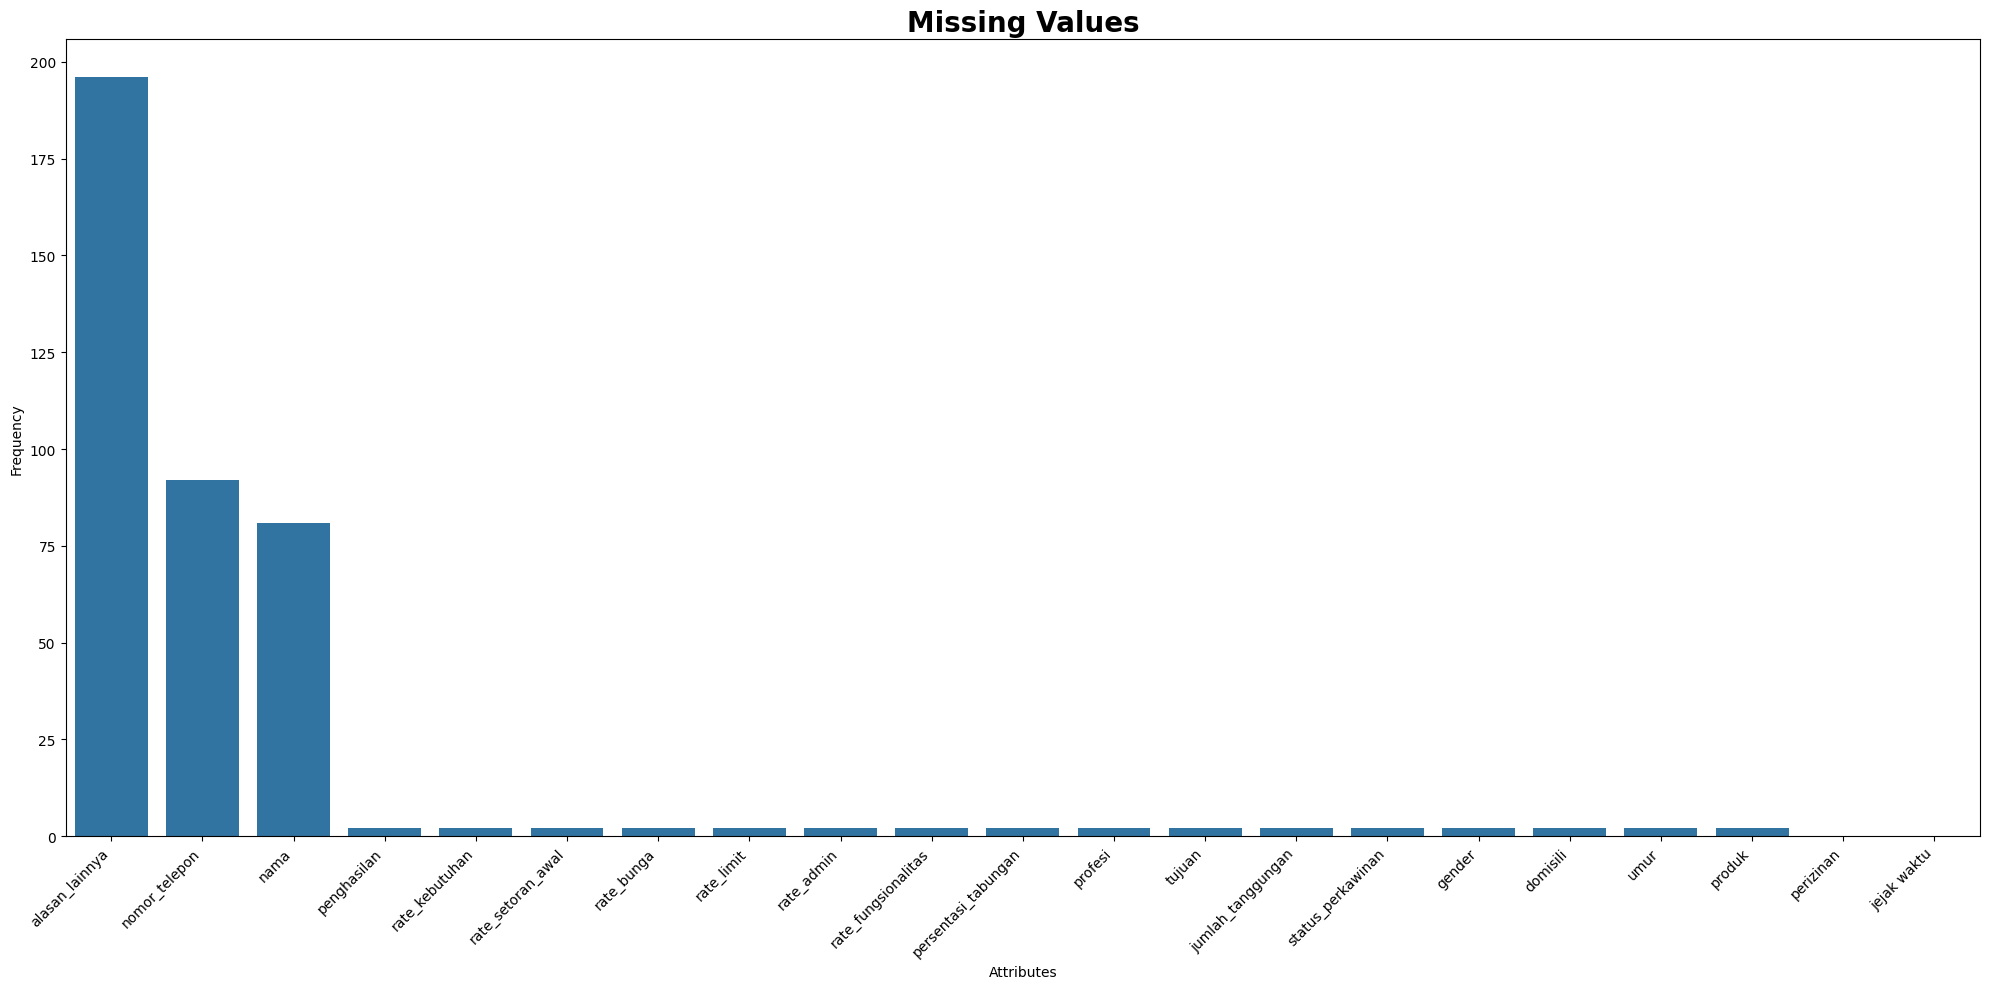

In [3]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()




In [4]:
# Hapus data by label
data.dropna(subset=['produk'], inplace=True)

data['alasan_lainnya'] = data['alasan_lainnya'].fillna("Tidak ada")

# Cek missing value
print(data.isnull().sum())

jejak waktu             0
perizinan               0
produk                  0
nama                   79
nomor_telepon          90
umur                    0
domisili                0
gender                  0
status_perkawinan       0
jumlah_tanggungan       0
profesi                 0
tujuan                  0
penghasilan             0
persentasi_tabungan     0
rate_fungsionalitas     0
rate_admin              0
rate_limit              0
rate_bunga              0
rate_setoran_awal       0
rate_kebutuhan          0
alasan_lainnya          0
dtype: int64


Remove Irrelevant Attributes

c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\bel's\college\sekrispi\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=F

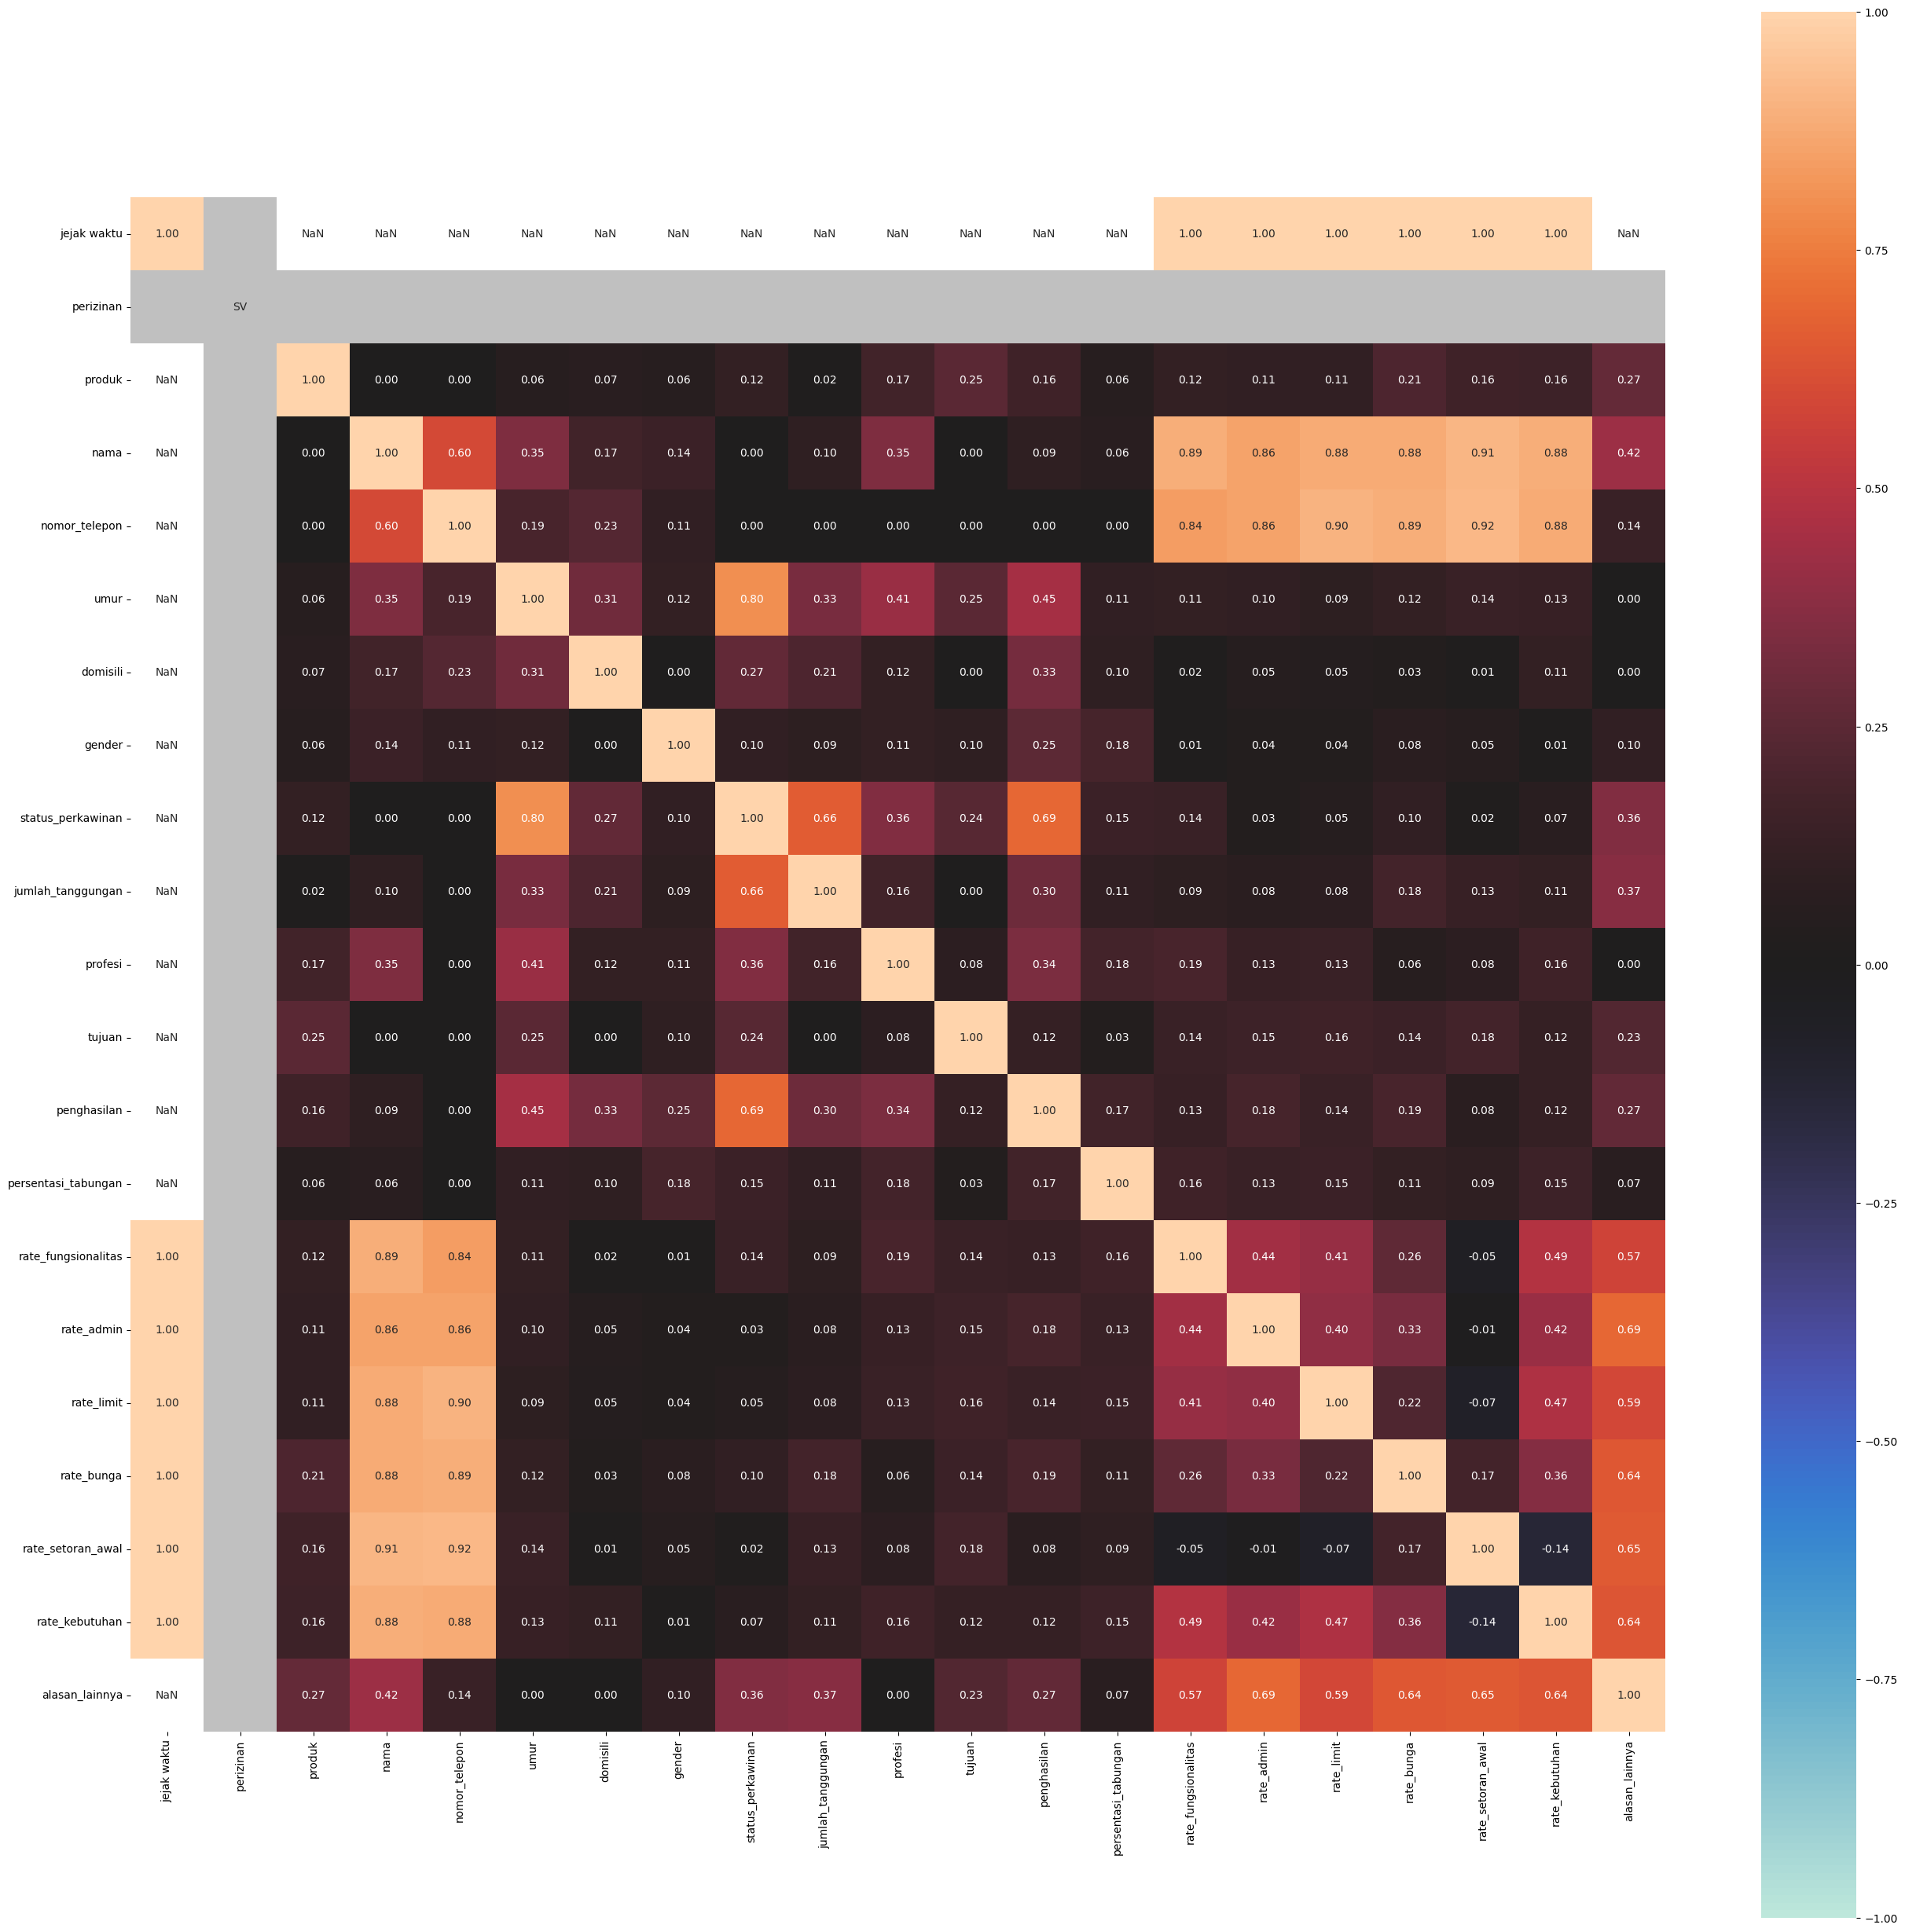

In [5]:
correlations = associations(data)
corr = correlations['corr']

In [6]:
# tampilin nilai corr mat by label
print(corr['produk'])

jejak waktu            0.000000
perizinan              0.000000
produk                 1.000000
nama                   0.000000
nomor_telepon          0.000000
umur                   0.059003
domisili               0.069054
gender                 0.061532
status_perkawinan      0.115047
jumlah_tanggungan      0.015509
profesi                0.168007
tujuan                 0.249911
penghasilan            0.159413
persentasi_tabungan    0.058629
rate_fungsionalitas    0.116634
rate_admin             0.107100
rate_limit             0.108607
rate_bunga             0.207091
rate_setoran_awal      0.162184
rate_kebutuhan         0.155289
alasan_lainnya         0.273742
Name: produk, dtype: float64


In [7]:
irrelevant_attributes = corr['produk'][corr['produk'] < 0.05].keys()
print("Kolom yang akan dihapus:", irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.05
for item in irrelevant_attributes:
    # Hapus kolom dengan nama yang ada di variabel `item`
    data.drop([item], axis=1, inplace=True)

print(data.columns)
data.to_csv("data.csv")

Kolom yang akan dihapus: Index(['jejak waktu', 'perizinan', 'nama', 'nomor_telepon',
       'jumlah_tanggungan'],
      dtype='object')
Index(['produk', 'umur', 'domisili', 'gender', 'status_perkawinan', 'profesi',
       'tujuan', 'penghasilan', 'persentasi_tabungan', 'rate_fungsionalitas',
       'rate_admin', 'rate_limit', 'rate_bunga', 'rate_setoran_awal',
       'rate_kebutuhan', 'alasan_lainnya'],
      dtype='object')


In [8]:
from sklearn import preprocessing

#one-hot encoding purpose
all_purpose = {'Investasi', 'Simpanan jangka panjang', 'Kegiatan sehari-hari', 'Lainnya'}
for purpose in all_purpose:
    data[purpose] = data['tujuan'].apply(lambda x:1 if purpose in x else 0)
 
#rename column purpose    
data.rename(columns = {
    "Investasi":"investasi",
    "Simpanan jangka panjang":"simpanan_jangka_panjang",
    "Kegiatan sehari-hari":"kegiatan_sehari-hari",
    "Lainnya":"tujuan_lainnya"
    }, 
            inplace = True)
data = data.drop('tujuan',axis=1)

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

In [10]:
# #Temp Penghitungan Data
# class_data = []

# # Menampilkan jumlah record per kelas sebelum oversampling
# print("Jumlah record per kelas sebelum resampling:")
# print(data['produk'].value_counts())

# # Membuat list untuk menampung DataFrame hasil upsampling
# resampled_dfs = []

# # Melakukan upsampling hanya pada kelas yang memiliki jumlah kurang dari 50
# for class_label in data['produk'].unique():
#     class_data = data[data['produk'] == class_label]
    
#     # Cek jika jumlah data pada kelas kurang dari 50
#     if len(class_data) < 50:
#         # resampled_dfs.append(class_data)
#         class_data_upsampled = resample(class_data,
#                                         replace=True,  # Sampling dengan penggantian
#                                         n_samples=100,  # Mengambil sampel sampai mencapai 50
#                                         random_state=42)  # Untuk hasil yang konsisten
#         resampled_dfs.append(class_data_upsampled)
#     else:
#         # resampled_dfs.append(class_data)
#         if len(class_data) > 100:
#             # resampled_dfs.append(class_data)
#             class_data_downsampled = resample(class_data,
#                                         replace=True,  # Sampling dengan penggantian
#                                         n_samples=100,  # Mengambil sampel sampai mencapai 50
#                                         random_state=42)  # Untuk hasil yang konsisten
#             resampled_dfs.append(class_data_downsampled)
#         # Jika jumlah data sudah cukup (>= 50), masukkan data aslinya
#         # else:
#         #     resampled_dfs.append(class_data)

# # Gabungkan kembali semua kelas yang sudah diupsample
# data = pd.concat(resampled_dfs)

# # Menampilkan jumlah record per kelas setelah oversampling
# print("\nJumlah record per kelas setelah resampling:")
# print(data['produk'].value_counts())

# # Menampilkan DataFrame yang sudah diupsample
# print("\nDataFrame setelah resampling:")
# print(data)


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

y = data['produk']
X = data.drop(['produk'],axis=1)
X = data.drop(['alasan_lainnya'],axis=1)

categorical_features=list(X.columns)
print(categorical_features)

# ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# smote = SMOTENC(categorical_features=categorical_features, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

['produk', 'umur', 'domisili', 'gender', 'status_perkawinan', 'profesi', 'penghasilan', 'persentasi_tabungan', 'rate_fungsionalitas', 'rate_admin', 'rate_limit', 'rate_bunga', 'rate_setoran_awal', 'rate_kebutuhan', 'investasi', 'simpanan_jangka_panjang', 'tujuan_lainnya', 'kegiatan_sehari-hari']


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

model = CatBoostClassifier(iterations=500, 
                           learning_rate=0.1, 
                           depth=6, 
                           cat_features=categorical_features, 
                           verbose=50,
                           auto_class_weights='SqrtBalanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

probabilities = model.predict_proba(X_test)
most_compatible_classes = np.argmax(probabilities, axis=1)  # Get the class with max probability

# Evaluate the model
accuracy_train = accuracy_score(y_train, model.predict(X_train)) * 100
print(f"Model Accuracy Train: " + str(accuracy_train))

precision_train = precision_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model Precision Train: " + str(precision_train))

recall_train = recall_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model Recall Train: " + str(recall_train))

f1_train = f1_score(y_train, model.predict(X_train), average='weighted') * 100
print(f"Model F1 Train: " + str(f1_train))


accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy Test: " + str(accuracy))

precision = precision_score(y_test, y_pred, average='weighted') * 100
print(f"Model Precision Test: " + str(precision))

recall = recall_score(y_test, y_pred, average='weighted') * 100
print(f"Model Recall Test: " + str(recall))

f1 = f1_score(y_test, y_pred, average='weighted') * 100
print(f"Model F1 Score Test: " + str(f1))



CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=8]=3.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

: 

In [ ]:
# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print confusion matrix
# print("Confusion Matrix:\n", cm)

# num_classes = cm.shape[0]  # Get number of classes
# conf_matrix_data = []

# # Compute TP, TN, FP, FN for each class
# for i in range(num_classes):
#     TP = cm[i, i]  # True Positive
#     FP = cm[:, i].sum() - TP  # False Positive (sum of the column minus TP)
#     FN = cm[i, :].sum() - TP  # False Negative (sum of the row minus TP)
#     TN = cm.sum() - (TP + FP + FN)  # True Negative (total sum minus TP, FP, FN)
    
#     conf_matrix_data.append([TP, FP, TN, FN])

# # Convert the confusion matrix data into a DataFrame for easy display
# conf_matrix_df = pd.DataFrame(conf_matrix_data, columns=['True Positive (TP)', 'False Positive (FP)', 'True Negative (TN)', 'False Negative (FN)'])

# # Display the confusion matrix table
# print("\nConfusion Matrix Table (TP, FP, TN, FN):")
# print(conf_matrix_df)